In [634]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


url = "C:/Users/mfavre4/Desktop/System_Identification/Python_Package/Data/training_data_indiRotorTorque_Sep13.csv"
df = pd.read_csv(url, sep=",")
dataset = df.astype(float)


#Outputs - Torque at each rotor poe
Output = (dataset['R_Core_2'])

#INputs
ds_I = dataset['Excitation']
ds_Pos = (dataset['Rotor_posn'])
ds_I1 = (ds_I).rename('I_1') 
ds_I2 = (ds_I).rename('I_2')
ds_I3 = (ds_I).rename('I_3')

Inputs = pd.concat([ds_I1,ds_I2, ds_I3,ds_Pos], axis=1)

x_train, x_test, y_train, y_test = train_test_split(Inputs, Output, test_size = 0.2)

norm_I = (ds_I-ds_I.mean())/(ds_I.std())

 





          I_1     I_2     I_3  Rotor_posn
0      968.04  968.04  968.04    0.000000
1      968.04  968.04  968.04   -0.085714
2      968.04  968.04  968.04   -0.171429
3      968.04  968.04  968.04   -0.257143
4      968.04  968.04  968.04   -0.342857
...       ...     ...     ...         ...
20021  107.40  107.40  107.40   -2.228571
20022  107.40  107.40  107.40   -2.314286
20023  107.40  107.40  107.40   -2.400000
20024  107.40  107.40  107.40   -2.485714
20025  107.40  107.40  107.40   -2.571429

[20026 rows x 4 columns]
-2.571429


In [669]:
#Normalization
"""
scaler = MinMaxScaler()
Xscaler = scaler.fit(x_train)

x_train_sc = Xscaler.fit_transform(x_train)
x_test_sc = Xscaler.fit_transform(x_test)
"""

scaler_pos = MinMaxScaler(feature_range=(0, 15))
Xpos_scaler =scaler_pos.fit(x_train['Rotor_posn'].values.reshape(-1,1)) 

scaler_I = MinMaxScaler(feature_range=(0, 1000))
XI_scaler =scaler_I.fit(x_train['I_1'].values.reshape(-1,1)) 

I1_sc = XI_scaler.fit_transform(x_train['I_1'].values.reshape(-1, 1))
I2_sc = XI_scaler.fit_transform(x_train['I_2'].values.reshape(-1, 1))
I3_sc = XI_scaler.fit_transform(x_train['I_3'].values.reshape(-1, 1))
Pos_sc =          
print(I1_sc)         

#x_train_sc = concatenate(),axis=1)




[[289.20140633]
 [692.51632346]
 [808.63887494]
 ...
 [108.08638875]
 [459.96986439]
 [252.938222  ]]


In [644]:
print(x_test_sc)
print(y_train)

[[0.77338021 0.77338021 0.77338021 0.93333318]
 [0.5874435  0.5874435  0.5874435  0.63333345]
 [0.80773481 0.80773481 0.80773481 0.16666686]
 ...
 [0.82300352 0.82300352 0.82300352 0.60000023]
 [0.1801105  0.1801105  0.1801105  0.40000016]
 [0.69532898 0.69532898 0.69532898 0.76666671]]
14744   -15.808874
11806   -43.005453
10      -30.200157
18808   -56.391705
1168    -29.191847
           ...    
6090      1.171422
471     -15.517880
17512     4.793805
19294   -55.875633
17895   -32.688547
Name: R_Core_2, Length: 16020, dtype: float64


In [651]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(5,), 
                       max_iter = 2000,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(x_train, y_train.ravel())

MLPRegressor(hidden_layer_sizes=(5,), max_iter=2000)

In [652]:
y_pred = mlp_reg.predict(x_test)

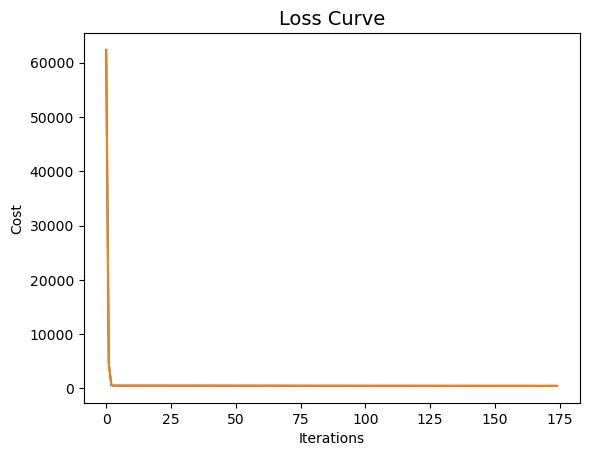

,Actual,Predicted
0,-63.195819,-24.780387
1,-24.146327,-24.929000
2,-25.338062,-29.354381
3,-53.068889,-21.605774
4,-22.397680,-20.494599


In [653]:
plt.plot(mlp_reg.loss_curve_)
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
df_temp = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred})
df_temp.head()


In [654]:

#mlp_reg.score(norm_inputs, Output)
metrics.r2_score(y_test, y_pred)

-0.021215275976473658

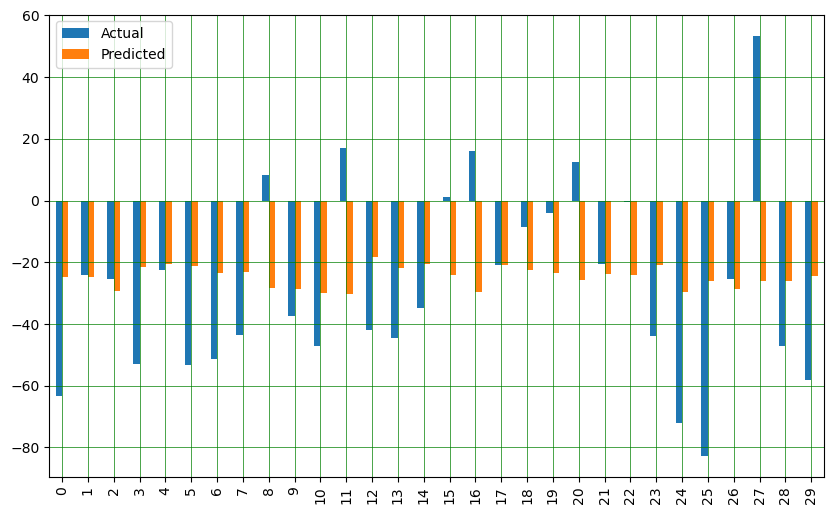

In [655]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [656]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test.ravel(), y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test.ravel(), y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.ravel(), y_pred)))

Mean Absolute Error: 23.111551590487935
Mean Squared Error: 908.8722475259267
Root Mean Squared Error: 30.147508147870642
